In [649]:
import seaborn as sns
# Plot the histogram thanks to the distplot function
import matplotlib.pyplot as plt
import numpy as np
import plotly.graph_objects as go
import pandas as pd

import plotly.express as px
d1 = pd.read_csv("GOOG.csv")
d2=  pd.read_csv("ENR.DE.csv")
d3 = pd.read_csv("GS.csv")
d4 = pd.read_csv("HCLTECH.NS.csv")
d5 = pd.read_csv("JNJ.csv")
d6 = pd.read_csv("MARUTI.NS.csv")
d7 = pd.read_csv("NFLX.csv")
d8 = pd.read_csv("TATAMOTORS.NS.csv")
d9 = pd.read_csv("TSLA.csv")
d10 = pd.read_csv("WMT.csv")


#### 9.95% U.P. POWER CORPORATION LIMITED

yield - 9.95%
Face Value	1,000,000.00
Coupon Rate	9.9500% (Fix)
Issue Date	07/Oct/2022
Maturity Date	31/Mar/2027
Remaining Period	3Y 1M 9D
Tax Free	No
Interest Payment Type	Simple
Interest Frequency	Quarterly
Issue Size (In Crores)	436.00
Max. Available Quantity	4
rf=0.0995


In [650]:
rf=0.0995

In [651]:
df = pd.concat([d1[ 'Close'], d2['Close'], d3[ 'Close'],d4[ 'Close'],d5[ 'Close'],d6[ 'Close'],d7[ 'Close'],d8[ 'Close'],d9[ 'Close'],d10[ 'Close']], axis=1)
df.columns = ['Google', 'Seimens', 'Goldman','HCL','J&J','Maruti','Netflix','TATA','Tesla','Walmart']

df.head()

Google  Seimens     Goldman          HCL         J&J        Maruti  \
0  137.919998   11.920  339.450012  1325.400024  149.910004  10566.250000   
1  138.619995   10.975  334.970001  1326.599976  151.119995  10535.150391   
2  140.020004   10.885  338.640015  1329.699951  150.820007  10494.549805   
3  138.220001   10.840  339.149994  1329.000000  152.500000  10488.500000   
4  138.050003   10.840  337.709991  1309.150024  151.279999  10515.650391   

      Netflix        TATA       Tesla     Walmart  
0  347.959991  674.299988  208.309998  155.300003  
1  337.500000  681.700012  197.369995  155.860001  
2  334.880005  681.200012  200.860001  154.669998  
3  323.649994  679.950012  202.070007  156.059998  
4  317.149994  673.700012  196.880005  156.770004

In [652]:
df.info()
df.dropna(inplace=True)

# Expected Return 
df = df.apply(pd.to_numeric, errors='coerce')

returns = df.pct_change()*100
mean_returns = returns.mean()
cov_matrix = returns.cov()
num_portfolios = 10000
risk_free_rate = 0.0995


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 251 entries, 0 to 250
Data columns (total 10 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Google   61 non-null     float64
 1   Seimens  62 non-null     float64
 2   Goldman  61 non-null     float64
 3   HCL      61 non-null     float64
 4   J&J      61 non-null     float64
 5   Maruti   61 non-null     float64
 6   Netflix  251 non-null    float64
 7   TATA     61 non-null     float64
 8   Tesla    251 non-null    float64
 9   Walmart  61 non-null     float64
dtypes: float64(10)
memory usage: 19.7 KB


In [653]:
data=df.copy()
stocks=df.columns

In [654]:
data

Google  Seimens     Goldman          HCL         J&J        Maruti  \
0   137.919998   11.920  339.450012  1325.400024  149.910004  10566.250000   
1   138.619995   10.975  334.970001  1326.599976  151.119995  10535.150391   
2   140.020004   10.885  338.640015  1329.699951  150.820007  10494.549805   
3   138.220001   10.840  339.149994  1329.000000  152.500000  10488.500000   
4   138.050003   10.840  337.709991  1309.150024  151.279999  10515.650391   
..         ...      ...         ...          ...         ...           ...   
56  148.729996   13.720  392.640015  1666.949951  157.850006  10709.700195   
57  146.369995   14.505  378.750000  1665.599976  156.470001  10794.500000   
58  147.139999   14.195  378.040009  1671.500000  155.740005  11027.950195   
59  143.940002   14.080  385.420013  1662.550049  157.919998  11090.250000   
60  141.759995   13.835  384.440002  1667.449951  156.550003  11380.400391   

       Netflix        TATA       Tesla     Walmart  
0   347.959991  674.299988  208.309998  155.300003  
1   337.500000  681.700012  197.369995  155.860001  
2   334.880005  681.200012  200.860001  154.669998  
3   323.649994  679.950012  202.070007  156.059998  
4   317.149994  673.700012  196.880005  156.770004  
..         ...         ...         ...         ...  
56  335.420013  911.599976  168.539993  170.300003  
57  344.760010  906.900024  172.080002  169.139999  
58  339.890015  918.299988  167.979996  168.600006  
59  335.890015  920.549988  166.350006  169.289993  
60  333.750000  938.599976  166.520004  170.360001  

[61 rows x 10 columns]

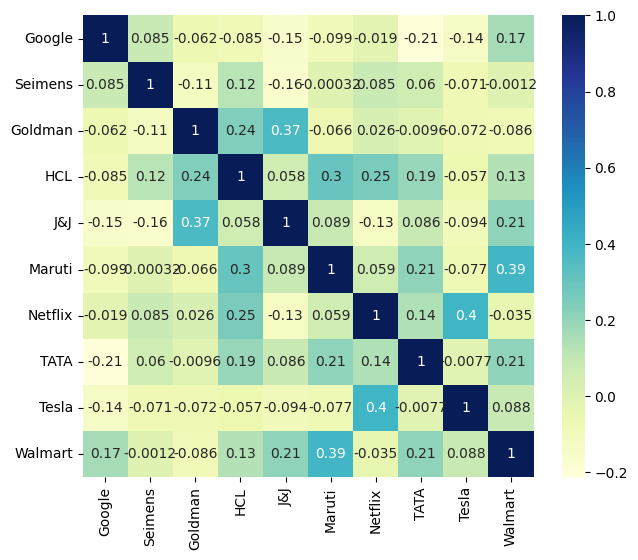

In [655]:
fig = plt.figure(figsize=(16, 6))
ax2 = fig.add_subplot(122)

sns.heatmap(returns.corr(), annot=True, cmap="YlGnBu", ax=ax2)
plt.show()

In [658]:
returns

Google   Seimens   Goldman       HCL       J&J    Maruti   Netflix  \
0        NaN       NaN       NaN       NaN       NaN       NaN       NaN   
1   0.507538 -7.927852 -1.319785  0.090535  0.807145 -0.294330 -3.006090   
2   1.009962 -0.820046  1.095625  0.233678 -0.198510 -0.385382 -0.776295   
3  -1.285533 -0.413413  0.150596 -0.052640  1.113906 -0.057647 -3.353443   
4  -0.122991  0.000000 -0.424592 -1.493602 -0.800001  0.258859 -2.008342   
..       ...       ...       ...       ...       ...       ...       ...   
56 -0.991882 -1.365924  2.180816  2.229239  0.695337 -0.215687  0.987535   
57 -1.586769  5.721574 -3.537595 -0.080985 -0.874251  0.791804  2.784568   
58  0.526067 -2.137194 -0.187456  0.354228 -0.466541  2.162677 -1.412575   
59 -2.174797 -0.810144  1.952175 -0.535444  1.399764  0.564926 -1.176851   
60 -1.514525 -1.740057 -0.254271  0.294722 -0.867525  2.616266 -0.637118   

        TATA     Tesla   Walmart  
0        NaN       NaN       NaN  
1   1.097438 -5.251790  0.360591  
2  -0.073346  1.768256 -0.763508  
3  -0.183500  0.602413  0.898688  
4  -0.919185 -2.568418  0.454957  
..       ...       ...       ...  
56 -0.371587 -0.360627  0.602554  
57 -0.515572  2.100397 -0.681153  
58  1.257025 -2.382616 -0.319258  
59  0.245018 -0.970348  0.409245  
60  1.960783  0.102193  0.632056  

[61 rows x 10 columns]

In [659]:
import scipy.optimize as sco


In [660]:
def portfolio_perf(weights, mean_returns, cov_matrix):
    returns = np.sum(mean_returns*weights ) #*252
    std = np.sqrt(np.dot(weights.T, np.dot(cov_matrix, weights))) #* np.sqrt(252)
    return std, returns

In [661]:
def random_portfolios(num_portfolios, mean_returns, cov_matrix, risk_free_rate):
    results = np.zeros((3,num_portfolios))
    weights_record = []
    for i in range(num_portfolios):
        weights = np.random.random(10)
        weights /= np.sum(weights)
        weights_record.append(weights)
        portfolio_std_dev, portfolio_return = portfolio_perf(weights, mean_returns, cov_matrix)
        results[0,i] = portfolio_std_dev
        results[1,i] = portfolio_return
        results[2,i] = (portfolio_return-risk_free_rate ) / portfolio_std_dev
    return results, weights_record


def random_portfolios_wrapper(mean_returns, cov_matrix, num_portfolios):
    risk_free_rate = 0.0  # You can adjust this as needed
    
    return random_portfolios(num_portfolios, mean_returns, cov_matrix, risk_free_rate)


In [662]:
def neg_sharpe_ratio(weights, mean_returns, cov_matrix, risk_free_rate):
    p_var, p_ret = portfolio_perf(weights, mean_returns, cov_matrix)
    return -(p_ret - risk_free_rate) / p_var

def max_sharpe_ratio(mean_returns, cov_matrix, risk_free_rate):
    num_assets = len(mean_returns)
    args = (mean_returns, cov_matrix, risk_free_rate)
    constraints = ({'type': 'eq', 'fun': lambda x: np.sum(x) - 1})
    bound = (0.0,1.0)
    bounds = tuple(bound for asset in range(num_assets))
    result = sco.minimize(neg_sharpe_ratio, num_assets*[1./num_assets,], args=args,
                        method='SLSQP', bounds=bounds, constraints=constraints)
    return result

In [663]:
def portfolio_volatility(weights, mean_returns, cov_matrix):
    return portfolio_perf(weights, mean_returns, cov_matrix)[0]

def min_variance(mean_returns, cov_matrix):
    num_assets = len(mean_returns)
    args = (mean_returns, cov_matrix)
    constraints = ({'type': 'eq', 'fun': lambda x: np.sum(x) - 1})
    bound = (0.0,1.0)
    bounds = tuple(bound for asset in range(num_assets))

    result = sco.minimize(portfolio_volatility, num_assets*[1./num_assets,], args=args,
                        method='SLSQP', bounds=bounds, constraints=constraints)

    return result

In [664]:
def efficient_return(mean_returns, cov_matrix, target):
    num_assets = len(mean_returns)
    args = (mean_returns, cov_matrix)

    def portfolio_return(weights):
        return portfolio_perf(weights, mean_returns, cov_matrix)[1]

    constraints = ({'type': 'eq', 'fun': lambda x: portfolio_return(x) - target},
                   {'type': 'eq', 'fun': lambda x: np.sum(x) - 1})
    bounds = tuple((0,1) for asset in range(num_assets))
    result = sco.minimize(portfolio_volatility, num_assets*[1./num_assets,], args=args, method='SLSQP', bounds=bounds, constraints=constraints)
    return result


def efficient_frontier(mean_returns, cov_matrix, returns_range):
    efficients = []
    for ret in returns_range:
        efficients.append(efficient_return(mean_returns, cov_matrix, ret))
    return efficients




In [676]:
def Markowitz(mean_returns, cov_matrix, num_portfolios):
    results, weights = random_portfolios_wrapper(mean_returns, cov_matrix, num_portfolios)
    
    max_sharpe_idx = np.argmax(results[2])
    sdp, rp = results[0, max_sharpe_idx], results[1, max_sharpe_idx]
    max_sharpe_ratio = results[2, max_sharpe_idx]  # Maximum Sharpe ratio
    max_sharpe_allocation = pd.DataFrame(weights[max_sharpe_idx], index=df.columns, columns=['allocation'])
    max_sharpe_allocation.allocation = [round(i * 100, 2) for i in max_sharpe_allocation.allocation]
    max_sharpe_allocation = max_sharpe_allocation.T
    
    min_vol_idx = np.argmin(results[0])
    sdp_min, rp_min = results[0, min_vol_idx], results[1, min_vol_idx]
    min_vol_allocation = pd.DataFrame(weights[min_vol_idx], index=df.columns, columns=['allocation'])
    min_vol_allocation.allocation = [round(i * 100, 2) for i in min_vol_allocation.allocation]
    min_vol_allocation = min_vol_allocation.T
    
    #return max_sharpe_ratio, sdp, rp, max_sharpe_allocation, sdp_min, rp_min, min_vol_allocation

    
    print("-" * 50)
    print("Maximum Sharpe Ratio Portfolio Allocation\n")
    print ("max_sharpe_ratio :",max_sharpe_ratio)
    print("Annualised Return:", round(rp, 2))
    print("Annualised Volatility:", round(sdp, 2))
    print("\n")
    print(max_sharpe_allocation  )
    print("-" * 80)
    print("Minimum Volatility Portfolio Allocation\n")
    print("Annualised Return:", round(rp_min, 2))
    print("Annualised Volatility:", round(sdp_min, 2))
    print("\n")
    print(min_vol_allocation)
    
    plt.figure(figsize=(15, 7))
    plt.scatter(results[0, :], results[1, :], c=results[2, :], cmap='YlGnBu', marker='o', s=10, alpha=0.3)
    plt.colorbar()
    plt.scatter(sdp, rp, marker='*', color='r', s=500, label='Maximum Sharpe ratio')
    plt.scatter(sdp_min, rp_min, marker='*', color='g', s=100, label='Minimum volatility')
    plt.xlabel('Annualised Volatility')
    plt.ylabel('Annualised Returns')
    plt.legend(labelspacing=0.8)

def random_portfolios_wrapper(mean_returns, cov_matrix, num_portfolios):
    # Define a placeholder for risk_free_rate
    risk_free_rate = 0.0  # You can adjust this as needed
    
    return random_portfolios(num_portfolios, mean_returns, cov_matrix, 0.0)


--------------------------------------------------
Maximum Sharpe Ratio Portfolio Allocation

max_sharpe_ratio : 0.4406159181953399
Annualised Return: 0.31
Annualised Volatility: 0.71


            Google  Seimens  Goldman   HCL   J&J  Maruti  Netflix   TATA  \
allocation    7.49     6.62    19.05  7.94  4.55    1.33     1.27  31.94   

            Tesla  Walmart  
allocation   0.28    19.52  
--------------------------------------------------------------------------------
Minimum Volatility Portfolio Allocation

Annualised Return: 0.14
Annualised Volatility: 0.52


            Google  Seimens  Goldman   HCL    J&J  Maruti  Netflix  TATA  \
allocation   16.75      1.9    16.38  4.47  16.82   10.84     1.08  6.11   

            Tesla  Walmart  
allocation   6.02    19.62  


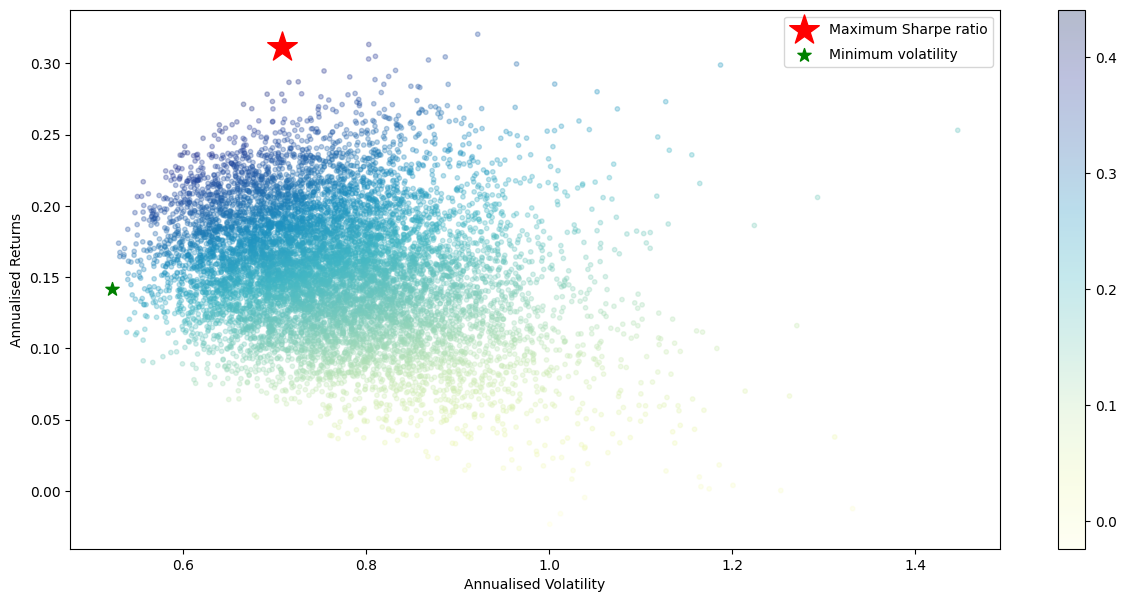

In [677]:

Markowitz(mean_returns, cov_matrix, num_portfolios)


##### Efficient frontier 

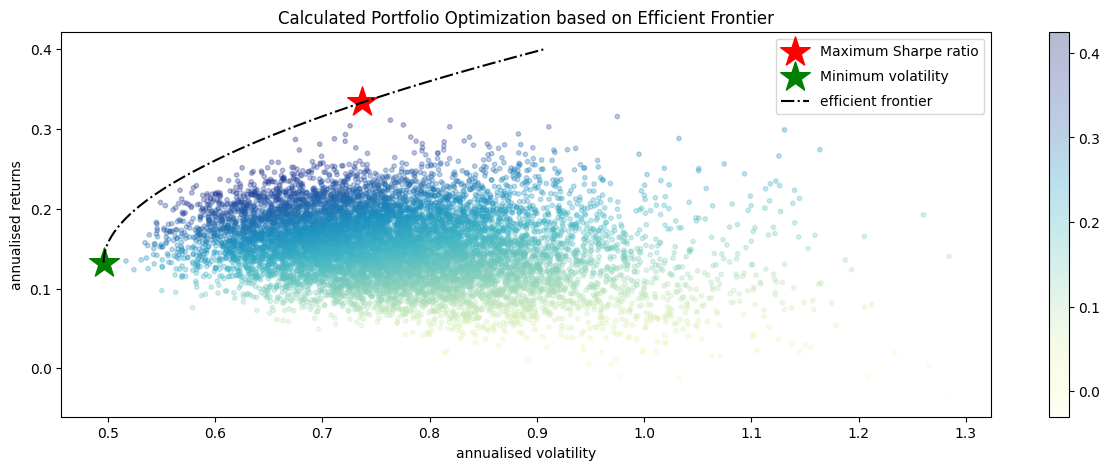

In [667]:

def effi_frontier(mean_returns, cov_matrix, num_portfolios,risk_free_rate):
    results, _ = random_portfolios(num_portfolios,mean_returns, cov_matrix, risk_free_rate)
    
    max_sharpe = max_sharpe_ratio(mean_returns, cov_matrix, risk_free_rate)
    sdp, rp = portfolio_perf(max_sharpe['x'], mean_returns, cov_matrix)
    max_sharpe_allocation = pd.DataFrame(max_sharpe.x,index=df.columns,columns=['allocation'])
    max_sharpe_allocation.allocation = [round(i*100,2)for i in max_sharpe_allocation.allocation]
    max_sharpe_allocation = max_sharpe_allocation.T
    max_sharpe_allocation

    min_vol = min_variance(mean_returns, cov_matrix)
    sdp_min, rp_min = portfolio_perf(min_vol['x'], mean_returns, cov_matrix)
    min_vol_allocation = pd.DataFrame(min_vol.x,index=df.columns,columns=['allocation'])
    min_vol_allocation.allocation = [round(i*100,2)for i in min_vol_allocation.allocation]
    min_vol_allocation = min_vol_allocation.T
    
 
    plt.figure(figsize=(15, 5))
    plt.scatter(results[0,:],results[1,:],c=results[2,:],cmap='YlGnBu', marker='o', s=10, alpha=0.3)
    plt.colorbar()
    plt.scatter(sdp,rp,marker='*',color='r',s=500, label='Maximum Sharpe ratio')
    plt.scatter(sdp_min,rp_min,marker='*',color='g',s=500, label='Minimum volatility')

    target = np.linspace(rp_min, 0.4, 50)
    efficient_portfolios = efficient_frontier(mean_returns, cov_matrix, target)
    plt.plot([p['fun'] for p in efficient_portfolios], target, linestyle='-.', color='black', label='efficient frontier')
    plt.title('Calculated Portfolio Optimization based on Efficient Frontier')
    plt.xlabel('annualised volatility')
    plt.ylabel('annualised returns')
    plt.legend(labelspacing=0.8)
    
effi_frontier(mean_returns, cov_matrix, num_portfolios,0.0)


## With Risk factor

In [668]:
import scipy.optimize as sco


--------------------------------------------------------------------------------
Maximum Sharpe Ratio Portfolio Allocation

max_sharpe_ratio : 0.27768977442312387
Annualised Return: 0.33
Annualised Volatility: 0.84


            Google  Seimens  Goldman    HCL   J&J  Maruti  Netflix   TATA  \
allocation    0.31     4.35    29.17  19.77  5.71    3.97     3.54  28.98   

            Tesla  Walmart  
allocation   0.34     3.86  
--------------------------------------------------------------------------------
Minimum Volatility Portfolio Allocation

Annualised Return: 0.14
Annualised Volatility: 0.53


            Google  Seimens  Goldman   HCL    J&J  Maruti  Netflix  TATA  \
allocation   13.81     3.95    12.28  5.29  16.12   15.49     4.02  4.93   

            Tesla  Walmart  
allocation   5.47    18.62  


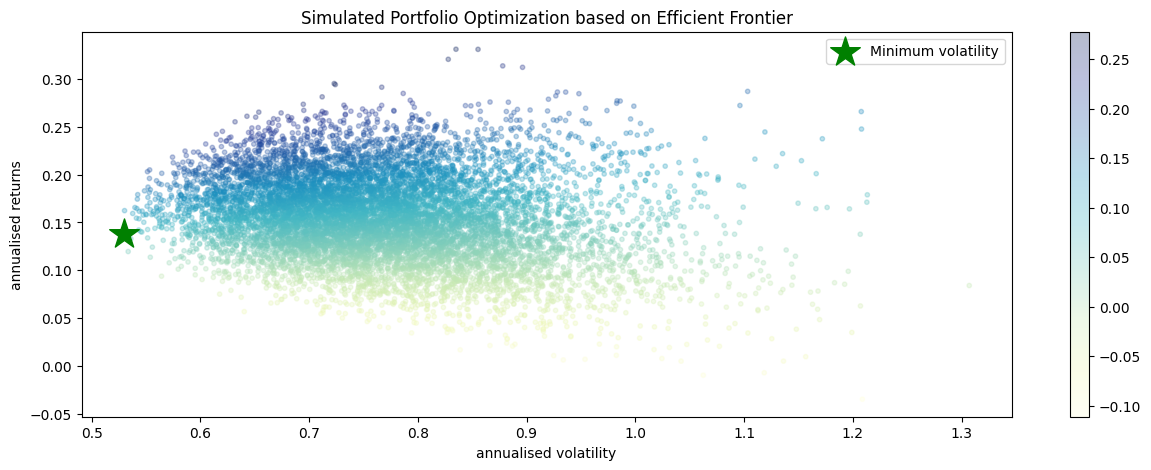

In [678]:

def Marowitz(mean_returns, cov_matrix, num_portfolios, risk_free_rate):
    results, weights = random_portfolios(num_portfolios,mean_returns, cov_matrix, risk_free_rate)
    
    max_sharpe_idx = np.argmax(results[2])
    sdp, rp = results[0,max_sharpe_idx], results[1,max_sharpe_idx]
    max_sharpe_ratio = results[2, max_sharpe_idx]  # Maximum Sharpe ratio

    max_sharpe_allocation = pd.DataFrame(weights[max_sharpe_idx],index=df.columns,columns=['allocation'])
    max_sharpe_allocation.allocation = [round(i*100,2)for i in max_sharpe_allocation.allocation]
    max_sharpe_allocation = max_sharpe_allocation.T
    
    min_vol_idx = np.argmin(results[0])
    sdp_min, rp_min = results[0,min_vol_idx], results[1,min_vol_idx]
    min_vol_allocation = pd.DataFrame(weights[min_vol_idx],index=df.columns,columns=['allocation'])
    min_vol_allocation.allocation = [round(i*100,2)for i in min_vol_allocation.allocation]
    min_vol_allocation = min_vol_allocation.T
    
    print( "-"*80)
    print( "Maximum Sharpe Ratio Portfolio Allocation\n")
    print("max_sharpe_ratio :", max_sharpe_ratio)
    print( "Annualised Return:", round(rp,2))
    print( "Annualised Volatility:", round(sdp,2))
    print( "\n")
    print( max_sharpe_allocation)
    print( "-"*80)
    print( "Minimum Volatility Portfolio Allocation\n")
    print( "Annualised Return:", round(rp_min,2))
    print( "Annualised Volatility:", round(sdp_min,2))
    print( "\n")
    print( min_vol_allocation)
    
    plt.figure(figsize=(15, 5))
    plt.scatter(results[0,:],results[1,:],c=results[2,:],cmap='YlGnBu', marker='o', s=10, alpha=0.3)
    plt.colorbar()

    plt.scatter(sdp_min,rp_min,marker='*',color='g',s=500, label='Minimum volatility')
    plt.title('Simulated Portfolio Optimization based on Efficient Frontier')
    plt.xlabel('annualised volatility')
    plt.ylabel('annualised returns')
    plt.legend(labelspacing=0.8)
    
Marowitz(mean_returns, cov_matrix, num_portfolios, rf)


## Efficient frontier

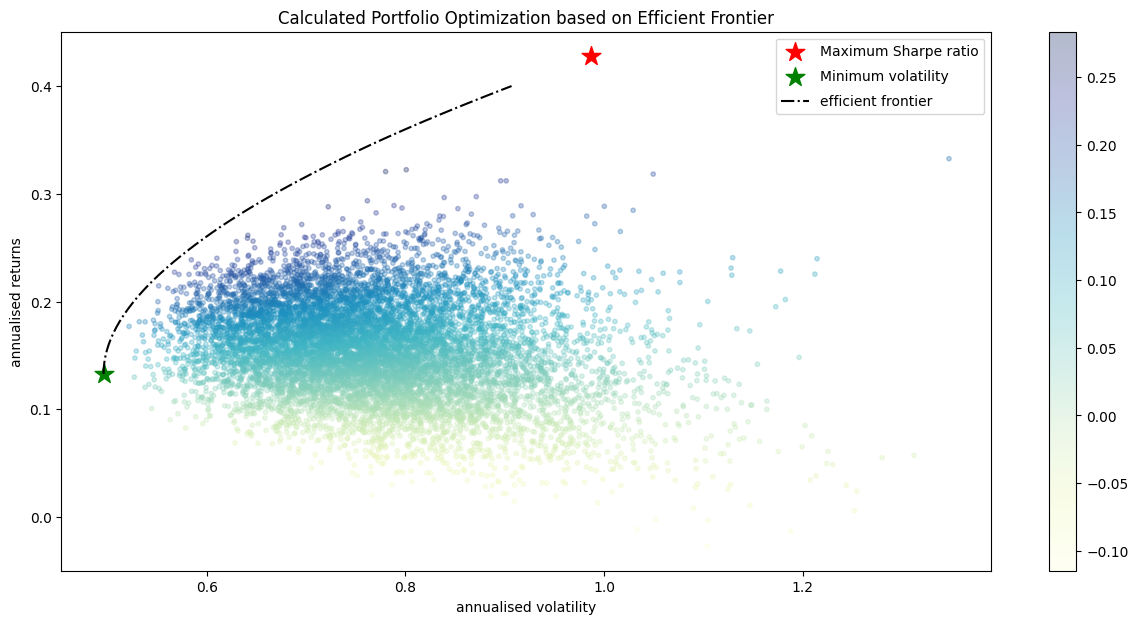

In [670]:

def effi_frontier(mean_returns, cov_matrix, num_portfolios,risk_free_rate):
    results, _ = random_portfolios(num_portfolios,mean_returns, cov_matrix, risk_free_rate)
    
    max_sharpe = max_sharpe_ratio(mean_returns, cov_matrix, risk_free_rate)
    sdp, rp = portfolio_perf(max_sharpe['x'], mean_returns, cov_matrix)
    max_sharpe_allocation = pd.DataFrame(max_sharpe.x,index=df.columns,columns=['allocation'])
    max_sharpe_allocation.allocation = [round(i*100,2)for i in max_sharpe_allocation.allocation]
    max_sharpe_allocation = max_sharpe_allocation.T
    max_sharpe_allocation

    min_vol = min_variance(mean_returns, cov_matrix)
    sdp_min, rp_min = portfolio_perf(min_vol['x'], mean_returns, cov_matrix)
    min_vol_allocation = pd.DataFrame(min_vol.x,index=df.columns,columns=['allocation'])
    min_vol_allocation.allocation = [round(i*100,2)for i in min_vol_allocation.allocation]
    min_vol_allocation = min_vol_allocation.T
    
 
    plt.figure(figsize=(15, 7))
    plt.scatter(results[0,:],results[1,:],c=results[2,:],cmap='YlGnBu', marker='o', s=10, alpha=0.3)
    plt.colorbar()
    plt.scatter(sdp,rp,marker='*',color='r',s=200, label='Maximum Sharpe ratio')
    plt.scatter(sdp_min,rp_min,marker='*',color='g',s=200, label='Minimum volatility')

    target = np.linspace(rp_min, 0.4, 50)
    efficient_portfolios = efficient_frontier(mean_returns, cov_matrix, target)
    plt.plot([p['fun'] for p in efficient_portfolios], target, linestyle='-.', color='black', label='efficient frontier')
    plt.title('Calculated Portfolio Optimization based on Efficient Frontier')
    plt.xlabel('annualised volatility')
    plt.ylabel('annualised returns')
    plt.legend(labelspacing=0.8)
    
effi_frontier(mean_returns, cov_matrix, num_portfolios,rf)


## CAPM

In [ ]:
mean_returns
rf=0.0995

In [ ]:
# risk free factor
rf=0.0995 #9.95%
## Beta value of each asset
# google
b0=1.06
# seimens - 5y monthly
b1=2.00
#goldman - 5y monthly
b2=	1.42
# hcl
b3=0.62
# j&j
b4=0.54
# maruti
b5=0.54
# netflix
b6=1.22
# tata
b7=1.34
#tesla
b8=2.43
# walmart
b9=0.49

beta =[b0,b1,b2,b3,b4,b5,b6,b7,b8,b9]

In [681]:
df.columns

Index(['Google', 'Seimens', 'Goldman', 'HCL', 'J&J', 'Maruti', 'Netflix',
       'TATA', 'Tesla', 'Walmart'],
      dtype='object')

In [679]:
beta

[1.06, 2.0, 1.42, 0.62, 0.54, 0.54, 1.22, 1.34, 2.43, 0.49]

## market return sp500

In [ ]:

dd = pd.read_csv("sp500.csv")
dd.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62 entries, 0 to 61
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Date    62 non-null     object
 1   Open    62 non-null     object
 2   High    62 non-null     object
 3   Low     62 non-null     object
 4   Close   62 non-null     object
dtypes: object(5)
memory usage: 2.6+ KB


In [699]:
dd.head()

Date     Open     High      Low    Close       ret
0  02/20/2024  4989.32  4993.71  4955.02  4975.51       NaN
1  02/16/2024  5031.13  5038.70  4999.52  5005.57  0.006042
2  02/15/2024  5003.14  5032.72  4999.44  5029.73  0.004827
3  02/14/2024  4976.44  5002.52  4956.45  5000.62 -0.005788
4  02/13/2024  4967.94  4971.30  4920.31  4953.17 -0.009489

In [ ]:
import pandas as pd

# Read the CSV file into a DataFrame
dd = pd.read_csv("sp500.csv")
df2=pd.DataFrame()
print(dd.dtypes)
df2['Close'] = dd['Close']

dd[['Open', 'High', 'Low', 'Close']] = dd[['Open', 'High', 'Low', 'Close']].replace(',', '', regex=True).astype(float)

dd['ret'] = dd['Close'].pct_change()
rm=dd['ret'].mean() * 100
# Print the first few rows of the DataFrame
print(abs(rm))
print(dd['ret'] )
df2['ret'] = dd['ret']


Date     object
Open     object
High     object
Low      object
Close    object
dtype: object
0.145395109704567
0          NaN
1     0.006042
2     0.004827
3    -0.005788
4    -0.009489
        ...   
57   -0.000979
58    0.001958
59   -0.000597
60   -0.004045
61    0.002025
Name: ret, Length: 62, dtype: float64


In [ ]:
df2

Close       ret
0   4,975.51       NaN
1   5,005.57  0.006042
2   5,029.73  0.004827
3   5,000.62 -0.005788
4   4,953.17 -0.009489
..       ...       ...
57  4,550.43 -0.000979
58  4,559.34  0.001958
59  4,556.62 -0.000597
60  4,538.19 -0.004045
61  4,547.38  0.002025

[62 rows x 2 columns]

In [ ]:
return2 = returns.join(dd['ret']*100)
return2

Google   Seimens   Goldman       HCL       J&J    Maruti   Netflix  \
0        NaN       NaN       NaN       NaN       NaN       NaN       NaN   
1   0.507538 -7.927852 -1.319785  0.090535  0.807145 -0.294330 -3.006090   
2   1.009962 -0.820046  1.095625  0.233678 -0.198510 -0.385382 -0.776295   
3  -1.285533 -0.413413  0.150596 -0.052640  1.113906 -0.057647 -3.353443   
4  -0.122991  0.000000 -0.424592 -1.493602 -0.800001  0.258859 -2.008342   
..       ...       ...       ...       ...       ...       ...       ...   
56 -0.991882 -1.365924  2.180816  2.229239  0.695337 -0.215687  0.987535   
57 -1.586769  5.721574 -3.537595 -0.080985 -0.874251  0.791804  2.784568   
58  0.526067 -2.137194 -0.187456  0.354228 -0.466541  2.162677 -1.412575   
59 -2.174797 -0.810144  1.952175 -0.535444  1.399764  0.564926 -1.176851   
60 -1.514525 -1.740057 -0.254271  0.294722 -0.867525  2.616266 -0.637118   

        TATA     Tesla   Walmart       ret  
0        NaN       NaN       NaN       NaN  
1   1.097438 -5.251790  0.360591  0.604159  
2  -0.073346  1.768256 -0.763508  0.482662  
3  -0.183500  0.602413  0.898688 -0.578759  
4  -0.919185 -2.568418  0.454957 -0.948882  
..       ...       ...       ...       ...  
56 -0.371587 -0.360627  0.602554  0.094713  
57 -0.515572  2.100397 -0.681153 -0.097917  
58  1.257025 -2.382616 -0.319258  0.195806  
59  0.245018 -0.970348  0.409245 -0.059658  
60  1.960783  0.102193  0.632056 -0.404466  

[61 rows x 11 columns]

In [ ]:
# import numpy as np
# import pandas as pd
# import matplotlib.pyplot as plt

# return2.dropna(inplace=True)

# beta = []
# alpha = []
# for col in return2.columns[:-1]:
#     if col != 'ret':
#         # Polynomial fitting
#         b, a = np.polyfit(return2[col],return2['ret'], 1)
#         print(b)
#         # Store beta and alpha values
#         beta.append(b)
#         alpha.append(a)
        

# print("Beta values:")
# print(beta)
# print("\nAlpha values:")
# print(alpha)


In [682]:
rm=return2['ret'].mean()
rm=rm*-1
volk=return2['ret'].std()
rm

0.15119342222163598

In [ ]:
# Create an empty list to store expected returns for each asset
exp_ret = []

for b in range(len(beta)):
    expected_return = rf + beta[b] * (rm- rf)
    exp_ret.append(expected_return)

# Print the expected return for each asset
for i, ret in enumerate(exp_ret):
    print(f"Expected return for Asset {i+1}: {ret:}")

Expected return for Asset 1: 0.15429502755493413
Expected return for Asset 2: 0.20288684444327196
Expected return for Asset 3: 0.1729046595547231
Expected return for Asset 4: 0.1315499217774143
Expected return for Asset 5: 0.12741444799968343
Expected return for Asset 6: 0.12741444799968343
Expected return for Asset 7: 0.1625659751103959
Expected return for Asset 8: 0.16876918577699224
Expected return for Asset 9: 0.22511501599857545
Expected return for Asset 10: 0.12482977688860164


In [ ]:

stock_returns = df.pct_change(1)
stock_returns = stock_returns.dropna()


ann_returns=stock_returns.mean()*100
ann_returns

cov = returns.cov()
cov

Google     0.059277
Seimens    0.298026
Goldman    0.216444
HCL        0.397690
J&J        0.075711
Maruti     0.131703
Netflix   -0.046112
TATA       0.564572
Tesla     -0.322829
Walmart    0.157718
dtype: float64

Minimum Volatility: 1.7186847544864399
Corresponding Return: 0.1328634324536048


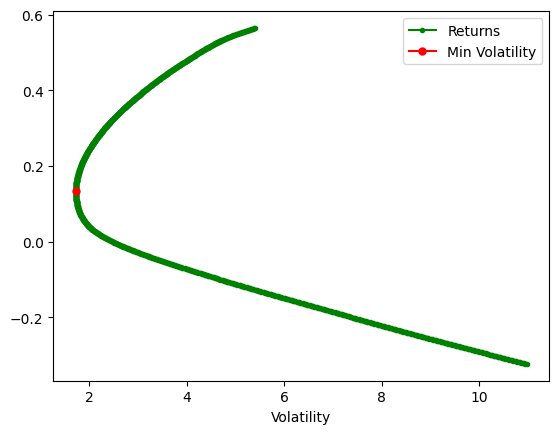

In [ ]:
import numpy as np
import pandas as pd
from scipy.optimize import minimize

def portfolio_return(weights, er):
    return weights.T @ er

def portfolio_vol(weights, covmat):
    return (weights.T @ covmat @ weights)**0.5

def minimize_vol(target_return, er, cov):
    n = er.shape[0]
    init_guess = np.repeat(1/n, n)
    bounds = ((0.0, 1.0),)*n
    return_is_target = {
        'type' : 'eq',
        'args' : (er,),
        'fun' : lambda weights, er : target_return - portfolio_return(weights, er)
    }
    weights_sum_to_1 = {
        'type' : 'eq',
        'fun' : lambda weights : np.sum(weights) - 1
    }
    results = minimize(portfolio_vol, init_guess,
                       args=(cov,), method='SLSQP',
                       options={'disp': False},
                       constraints=(return_is_target, weights_sum_to_1),
                       bounds=bounds
                      )
    return results.x

def optimal_weights(n_points, er, cov):
    target_rs = np.linspace(er.min(), er.max(), n_points)
    weights = [minimize_vol(target_return, er, cov) for target_return in target_rs]
    return weights

def plot_ef(n_points, er, cov):
    weights = optimal_weights(n_points, er, cov)
    rets = [portfolio_return(w, er) for w in weights]
    vols = np.array([portfolio_vol(w, cov) for w in weights])
    ef = pd.DataFrame({'Returns': rets, 'Volatility': vols})
    min_volatility_index = ef['Volatility'].idxmin()
    min_volatility = ef.loc[min_volatility_index, 'Volatility']
    min_volatility_return = ef.loc[min_volatility_index, 'Returns']
    
    fig = ef.plot(x='Volatility', y='Returns', style='.-', color='green')
    fig.plot(min_volatility, min_volatility_return, marker='o', markersize=5, color='red', label='Min Volatility')
    fig.legend()
    
    return min_volatility, min_volatility_return


min_volatility, min_volatility_return = plot_ef(1000, stock_returns.mean()*100, cov*12)
print("Minimum Volatility:", min_volatility)
print("Corresponding Return:", min_volatility_return)


In [ ]:
risk_free_rate=0.0995

In [ ]:

def msr(risk_free_rate, er, cov):
    
    n = er.shape[0]
    init_guess = np.repeat(1/n, n)
    bounds = ((0.0, 1.0),)*n
    weights_sum_to_1 = {
        'type' : 'eq',
        'fun' : lambda weights : np.sum(weights) - 1
    }
    
    def neg_sharpe_ratio(weights, risk_free_rate, er, cov):
       
        r = portfolio_return(weights, er)
        vol = portfolio_vol(weights, cov)
        return -(r - risk_free_rate)/vol
    
    results = minimize(neg_sharpe_ratio, init_guess,
                       args=(risk_free_rate, er,cov,), method='SLSQP',
                       options={'disp': False},
                       constraints=(weights_sum_to_1),
                        bounds=bounds
                       )
    print(results)
    return results.x

In [ ]:
msr(risk_free_rate, ann_returns, cov)

 message: Optimization terminated successfully
 success: True
  status: 0
     fun: -0.33238582764074154
       x: [ 8.386e-02  3.441e-02  1.617e-01  1.740e-01  1.699e-17
            1.911e-17  0.000e+00  5.460e-01  1.369e-17  2.109e-17]
     nit: 7
     jac: [-1.010e-01 -1.014e-01 -1.005e-01 -1.008e-01 -3.915e-02
           -2.852e-02  2.005e-01 -1.008e-01  2.555e-01 -9.680e-02]
    nfev: 77
    njev: 7


array([8.38646918e-02, 3.44074289e-02, 1.61734339e-01, 1.73985514e-01,
       1.69948691e-17, 1.91090633e-17, 0.00000000e+00, 5.46008026e-01,
       1.36880524e-17, 2.10877323e-17])

In [ ]:
ann_returns=stock_returns.mean()*100

max matkowitz sharpe ration :  0.33238590660113937
sharpe return :  0.42777537815929556
max_sharpe_volatility :  0.9876332649483347
Minimum Volatility: 0.49614146337349474
Corresponding Return: 0.13286343244245027
 message: Optimization terminated successfully
 success: True
  status: 0
     fun: -0.33238582764074154
       x: [ 8.386e-02  3.441e-02  1.617e-01  1.740e-01  1.699e-17
            1.911e-17  0.000e+00  5.460e-01  1.369e-17  2.109e-17]
     nit: 7
     jac: [-1.010e-01 -1.014e-01 -1.005e-01 -1.008e-01 -3.915e-02
           -2.852e-02  2.005e-01 -1.008e-01  2.555e-01 -9.680e-02]
    nfev: 77
    njev: 7
Individual Security Market Lines:
Asset 1 SML: 0.1575827292082302
Asset 2 SML: 0.30627368888654394
Asset 3 SML: 0.14501088892392833
Optimized Sharpe Ratio of CML (MSR): 0.33238582764074154


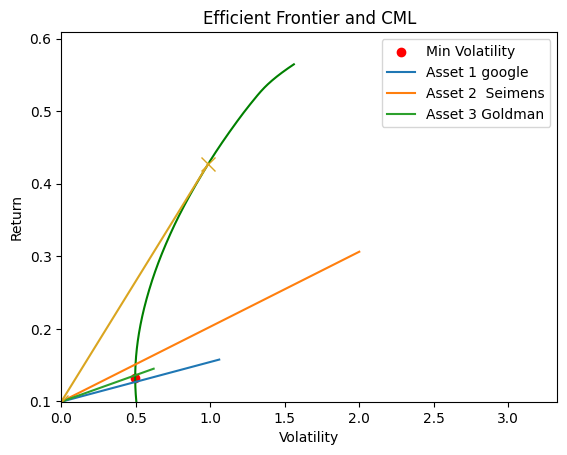

In [688]:
import numpy as np
import pandas as pd
from scipy.optimize import minimize
import matplotlib.pyplot as plt

def portfolio_return(weights, er):
    return weights @ er

def portfolio_vol(weights, covmat):
    return np.sqrt(weights @ covmat @ weights)

def minimize_vol(target_return, er, cov):
    n = er.shape[0]
    init_guess = np.repeat(1/n, n)
    bounds = ((0.0, 1.0),)*n
    return_is_target = {
        'type' : 'eq',
        'args' : (er,),
        'fun' : lambda weights, er : target_return - portfolio_return(weights, er)
    }
    weights_sum_to_1 = {
        'type' : 'eq',
        'fun' : lambda weights : np.sum(weights) - 1
    }
    results = minimize(portfolio_vol, init_guess,
                       args=(cov,), method='SLSQP',
                       options={'disp': False},
                       constraints=(return_is_target, weights_sum_to_1),
                       bounds=bounds
                      )
    return results.x

def optimal_weights(n_points, er, cov):
    target_rs = np.linspace(er.min(), er.max(), n_points)
    weights = [minimize_vol(target_return, er, cov) for target_return in target_rs]
    return weights

def plot_ef(n_points, er, cov):
    weights = optimal_weights(n_points, er, cov)
    rets = [portfolio_return(w, er) for w in weights]
    vols = np.array([portfolio_vol(w, cov) for w in weights])
    ef = pd.DataFrame({'Returns': rets, 'Volatility': vols})
    sharpe_ratios = [((ret - risk_free_rate) / vol) for ret, vol in zip(rets, vols)]
    min_volatility_index = ef['Volatility'].idxmin()
    min_volatility = ef.loc[min_volatility_index, 'Volatility']
    min_volatility_return = ef.loc[min_volatility_index, 'Returns']
    max_sharpe_index=np.argmax(sharpe_ratios)
    
    print("max matkowitz sharpe ration : ",sharpe_ratios[max_sharpe_index])
    max_sharpe_return = rets[max_sharpe_index]
    max_sharpe_volatility = vols[max_sharpe_index]
    print("sharpe return : ",max_sharpe_return)
    print("max_sharpe_volatility : ",max_sharpe_volatility)
    
    fig, ax = plt.subplots()  # Create a new figure and Axes object
    ax.plot(ef['Volatility'], ef['Returns'], linestyle='-', color='green')
    ax.scatter(min_volatility, min_volatility_return, color='red', label='Min Volatility')
    ax.set_xlabel('Volatility')
    ax.set_ylabel('Return')
    ax.set_title('Efficient Frontier with Minimum Volatility')
    ax.legend()
    
    return min_volatility, min_volatility_return, ax  # Return the minimum volatility, corresponding return, and Axes object

# Example usage
min_volatility, min_volatility_return, ax = plot_ef(1000, stock_returns.mean()*100, cov)
print("Minimum Volatility:", min_volatility)
print("Corresponding Return:", min_volatility_return)

# Calculate MSR portfolio weights and related metrics
risk_free_rate = 0.0995
w_msr = msr(risk_free_rate, ann_returns, cov)
ret_msr = portfolio_return(w_msr, ann_returns)
vol_msr = portfolio_vol(w_msr, cov)

# Adding CML
cml_x = [0, vol_msr]
cml_y = [risk_free_rate, ret_msr]
# Calculate the optimized Sharpe ratio of the CML (MSR)
ret_msr = cml_y[-1]  # Expected return of the MSR
vol_msr = cml_x[-1]  # Volatility of the MSR

sharpe_ratio_cml = (ret_msr - risk_free_rate) / vol_msr

print("Optimized Sharpe Ratio of CML (MSR):", sharpe_ratio_cml)

ax.plot(cml_x, cml_y, color='goldenrod', marker='x', markersize=10)
ax.set_xlim(left=0)
ax.set_title('Efficient Frontier and CML')

# Set limits for CML
ax.set_ylim(bottom=risk_free_rate)  # Ensure CML starts from the risk-free rate

# Show the plot
plt.show()


In [ ]:
asset_sharpe_ratios = [(asset_return - risk_free_rate) / asset_beta for asset_return, asset_beta in zip(exp_ret, beta)]
asset_sharpe_ratios

[0.05169342222163596,
 0.051693422221635976,
 0.051693422221635976,
 0.05169342222163598,
 0.051693422221635976,
 0.051693422221635976,
 0.05169342222163597,
 0.05169342222163599,
 0.05169342222163598,
 0.05169342222163599]

In [ ]:
# Return and Vol of Max Sharpe Ratio Portfolio
ret_msr, vol_msr


(0.42768498658415666, 0.9873615518254726)

In [685]:
# Given values
rf = 0.0995  # Risk-free rate

# Asset 1
asset1_return = 0.15  # Expected return of asset 1
beta_asset1 = 1.2  # Beta of asset 1
sml_asset1 = rf + beta[0] * (exp_ret[0] - rf)

# Asset 2
asset2_return = 0.10  # Expected return of asset 2
beta_asset2 = 0.8  # Beta of asset 2
sml_asset2 = rf + beta[1] * (exp_ret[1] - rf)

# Asset 3
asset3_return = 0.08  # Expected return of asset 3
beta_asset3 = 1.0  # Beta of asset 3
sml_asset3 = rf + beta[3] * (exp_ret[2] - rf)

# Display results
print("Individual Security Market Lines:")
print("Asset 1 SML:", sml_asset1)
print("Asset 2 SML:", sml_asset2)
print("Asset 3 SML:", sml_asset3)


Individual Security Market Lines:
Asset 1 SML: 0.1575827292082302
Asset 2 SML: 0.30627368888654394
Asset 3 SML: 0.14501088892392833


In [ ]:
beta
rm=rm*-1

In [ ]:
df.columns

Index(['Google', 'Seimens', 'Goldman', 'HCL', 'J&J', 'Maruti', 'Netflix',
       'TATA', 'Tesla', 'Walmart'],
      dtype='object')

max matkowitz sharpe ration :  0.33238590660113937
sharpe return :  0.42777537815929556
max_sharpe_volatility :  0.9876332649483347
Minimum Volatility: 0.49614146337349474
Corresponding Return: 0.13286343244245027
 message: Optimization terminated successfully
 success: True
  status: 0
     fun: -0.33238582764074154
       x: [ 8.386e-02  3.441e-02  1.617e-01  1.740e-01  1.699e-17
            1.911e-17  0.000e+00  5.460e-01  1.369e-17  2.109e-17]
     nit: 7
     jac: [-1.010e-01 -1.014e-01 -1.005e-01 -1.008e-01 -3.915e-02
           -2.852e-02  2.005e-01 -1.008e-01  2.555e-01 -9.680e-02]
    nfev: 77
    njev: 7
Individual Security Market Lines:
Asset 1 SML: 0.1575827292082302
Asset 2 SML: 0.30627368888654394
Asset 3 SML: 0.14501088892392833
Optimized Sharpe Ratio of CML (MSR): 0.33238582764074154


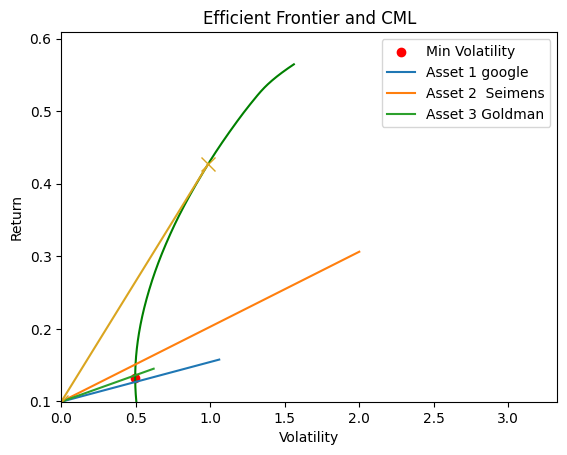

In [700]:

min_volatility, min_volatility_return, ax = plot_ef(1000, stock_returns.mean()*100, cov)
print("Minimum Volatility:", min_volatility)
print("Corresponding Return:", min_volatility_return)

# Calculate MSR portfolio weights and related metrics
risk_free_rate = 0.0995
w_msr = msr(risk_free_rate, ann_returns, cov)
ret_msr = portfolio_return(w_msr, ann_returns)
vol_msr = portfolio_vol(w_msr, cov)

# Adding CML
cml_x = [0, vol_msr]
cml_y = [risk_free_rate, ret_msr]
# Calculate the optimized Sharpe ratio of the CML (MSR)
ret_msr = cml_y[-1]  # Expected return of the MSR
vol_msr = cml_x[-1]  # Volatility of the MSR

sharpe_ratio_cml = (ret_msr - risk_free_rate) / vol_msr
import matplotlib.pyplot as plt

# Given values
rf = 0.0995  # Risk-free rate (hypothetical value)

# Asset 1
asset1_return = rm  # Expected return of asset 1
beta_asset1 = beta[0]    # Beta of asset 1
sml_asset1 = rf + beta_asset1 * (exp_ret[0] - rf)

# Asset 2
asset2_return = rm  # Expected return of asset 2
beta_asset2 = beta[1]     # Beta of asset 2
sml_asset2 = rf + beta_asset2 * (exp_ret[1] - rf)

# Asset 3
asset3_return = rm # Expected return of asset 3
beta_asset3 = beta[3]     # Beta of asset 3
sml_asset3 = rf + beta_asset3 * (exp_ret[2] - rf)

# Display results
print("Individual Security Market Lines:")
print("Asset 1 SML:", sml_asset1)
print("Asset 2 SML:", sml_asset2)
print("Asset 3 SML:", sml_asset3)

# Plotting
plt.plot([0, beta_asset1], [rf, sml_asset1], label='Asset 1 google')
plt.plot([0, beta_asset2], [rf, sml_asset2], label='Asset 2  Seimens')
plt.plot([0, beta_asset3], [rf, sml_asset3], label='Asset 3 Goldman')


print("Optimized Sharpe Ratio of CML (MSR):", sharpe_ratio_cml)

ax.plot(cml_x, cml_y, color='goldenrod', marker='x', markersize=10)
ax.set_xlim(left=0)
ax.set_title('Efficient Frontier and CML')
plt.legend()

ax.set_ylim(bottom=risk_free_rate)  # Ensure CML starts from the risk-free rate

# Show the plot
plt.show()


In [691]:
returns.std()

Google     1.647749
Seimens    3.186780
Goldman    1.343309
HCL        1.715560
J&J        0.838478
Maruti     1.275150
Netflix    2.194661
TATA       1.561083
Tesla      3.170381
Walmart    0.824738
dtype: float64

In [692]:
exp_ret

[0.15429502755493413,
 0.20288684444327196,
 0.1729046595547231,
 0.1315499217774143,
 0.12741444799968343,
 0.12741444799968343,
 0.1625659751103959,
 0.16876918577699224,
 0.22511501599857545,
 0.12482977688860164]

In [698]:
import numpy as np
import pandas as pd

# Given data
asset_returns = pd.Series(exp_ret)  # Example asset returns
risk_free_rate = 0.0995  # Example risk-free rate

excess_returns = asset_returns - risk_free_rate

# Calculate volatility for each asset
asset_volatility = returns.std()
print(asset_volatility)


# Display the Sharpe Ratios for each asset
asset_sharpe_ratio=[]
for i, asset_return in enumerate(asset_returns):
    asset_sharpe_ratio = excess_returns[i]/asset_volatility[i]
    print(f"Asset {i+1} Sharpe Ratio: {asset_sharpe_ratio}")


Google     1.647749
Seimens    3.186780
Goldman    1.343309
HCL        1.715560
J&J        0.838478
Maruti     1.275150
Netflix    2.194661
TATA       1.561083
Tesla      3.170381
Walmart    0.824738
dtype: float64
Asset 1 Sharpe Ratio: 0.03325447739807227
Asset 2 Sharpe Ratio: 0.0324424174914995
Asset 3 Sharpe Ratio: 0.05464467132064009
Asset 4 Sharpe Ratio: 0.018681898194805775
Asset 5 Sharpe Ratio: 0.033291787771096606
Asset 6 Sharpe Ratio: 0.0218911164651139
Asset 7 Sharpe Ratio: 0.028736083387127066
Asset 8 Sharpe Ratio: 0.04437251892264289
Asset 9 Sharpe Ratio: 0.039621429719824325
Asset 10 Sharpe Ratio: 0.030712508384456542


C:\Users\RAmsh\AppData\Local\Temp\ipykernel_29472\13715374.py:22: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  asset_sharpe_ratio = excess_returns[i]/asset_volatility[i]
